# IS509 Assignment 4

### Due: January 16, Sunday-23.30

### Submission and Grading Policy

- Submit your assignments to the corresponding assignment link in https://odtuclass.metu.edu.tr.
- Solutions should be submitted in a single **ipynb** file named: metu-username_HW_4.ipynb (e.g., “e123456_HW_4.ipynb”).
- Late submissions will be accepted by January 19, 2022, 23:30 with 5% per day penalty.
<!-- - Do not change variable names in the code blocks and the texts in the markdowns. -->
- **This is an individual assignment. You have to adhere to the academic integrity principles.**
- You are supposed to be able to interpret your findings. Hence, you shouldn't just find a number or result and just leave it. You need to comment on your findings by giving as much as **necessary** details.

#### <span style="background-color:#7299EB">After applying required preprocessing steps, fit specified models to the data.</span>    
    
#### <span style="background-color:#7299EB">    When necessary you can use (%70 train - %30 test) or (%60 train - %20 validation - %20 test) splits for the questions. </span>


## PART 1-Classification
    
**Q1.(50).** Fit Logistic Regression, Gaussian Naive Bayes,  Decision Tree models to your training set. **Perform hyperparameter tuning** and try to figure out the best model. Report the model performances. Which performance metric would you prefer to use for Part I? Why? Comment on your findings.
    
### PART 2
    
**Q2.(15).** Generate k-means models for k= 2, 3, 4, 5, 6, 7, 8, 9, and 10. Determine the optimal value of k by looking at the wss graph and silhouette scores.   

**Q3.(15).** Generate DBSCAN models for epsilon values between 0.1 (included) and 2.5(included) incrementing it with steps=0.10 and for min_samples=5, 10, 15 and 20. Find the optimal value of k by adjusted rand scores. (While calculating adjusted rand scores, you will need true labels. Please see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score)   

**Q4.(20).** Plot the clusters for only the optimal k values based on predicted clusters that you obtain Q2 and Q3. Plot the original data based on the true labels. Did you obtain the same optimal k values in Q2 and Q3? Comment on the quality of the clusters that you obtained in Q2 and Q3. Can we predict the true label of the data by using clustering? Which algorithm gave a better result? What could be the reason one of them outperforms in different cases?

**Do not forget to use random_state and seeds for reproducibility.** 

In [36]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

import matplotlib.pyplot as plt



In [37]:
data = pd.read_csv("data.csv")

data.head()

,x0,x1,y
0,281.931378,145.018979,1
1,357.750303,119.483971,1
2,381.598615,146.832723,1
3,377.749439,134.867567,1
4,329.865988,143.835645,0


In [38]:
data.isnull().sum().sum()              # no NaN value.

0

In [39]:
data['y'].value_counts()

3    550
2    550
5    500
4    500
1    450
0    450
Name: y, dtype: int64

**Fit Gaussian Naive Bayes model**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data[["x0","x1"]], data["y"], test_size=0.3, random_state=1)
 
var_smoothing_values = [1e-01,1e-02,1e-05,1e-09]      # 1e-09 is default.

for e_value in var_smoothing_values:
    model1 = GaussianNB(var_smoothing=e_value)
    model1.fit(X_train, y_train)
    y_train_pred = model1.predict(X_train)

    print('train accuracy = ', metrics.accuracy_score(y_train, y_train_pred))

    y_test_pred = model1.predict(X_test)

    print('test accuracy = ', metrics.accuracy_score(y_test_pred, y_test))
    print('test confusion matrix:\n', metrics.confusion_matrix(y_test_pred, y_test))

train accuracy =  0.7752380952380953
test accuracy =  0.7733333333333333
test confusion matrix:
 [[114  21   0   0   0   0]
 [ 36 104   0   0   0   0]
 [  0   0 160   0   0   0]
 [  0   0   0 170   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0 147 148]]
train accuracy =  0.9433333333333334
test accuracy =  0.9422222222222222
test confusion matrix:
 [[126  16   0   0   0   0]
 [ 24 109   0   0   0   0]
 [  0   0 160   0   0   0]
 [  0   0   0 170   0   0]
 [  0   0   0   0 135   0]
 [  0   0   0   0  12 148]]
train accuracy =  0.9652380952380952
test accuracy =  0.96
test confusion matrix:
 [[129  15   0   0   0   0]
 [ 21 110   0   0   0   0]
 [  0   0 160   0   0   0]
 [  0   0   0 170   0   0]
 [  0   0   0   0 147   0]
 [  0   0   0   0   0 148]]
train accuracy =  0.9652380952380952
test accuracy =  0.96
test confusion matrix:
 [[129  15   0   0   0   0]
 [ 21 110   0   0   0   0]
 [  0   0 160   0   0   0]
 [  0   0   0 170   0   0]
 [  0   0   0   0 147   0]
 [  0   0   0   

A Gaussian curve can serve as a "low pass" filter, allowing only the samples close to its mean to "pass." In the context of Naive Bayes, assuming a Gaussian distribution is essentially giving more weights to the samples closer to the distribution mean. This might or might not be appropriate depending if what you want to predict follows a normal distribution.

The variable, var_smoothing, artificially adds a user-defined value to the distribution's variance (whose default value is derived from the training data set). This essentially widens (or "smooths") the curve and accounts for more samples that are further away from the distribution mean.
 var_smoothing represents portion of the largest variance of all features that is added to variances for calculation stability. As it decreases, the accuracy increases.

**Fit Decision Tree Model**

In [41]:
X1_train, X1_test, y1_train, y1_test = train_test_split(data[["x0","x1"]], data["y"], test_size=0.3, random_state=1)

max_depth_value = [2,3,4,10]

for depth in max_depth_value:
    model2 = DecisionTreeClassifier(max_depth=depth) 
    
    model2.fit(X1_train, y1_train)
    y1_train_pred = model2.predict(X1_train)
    
    print('train accuracy = ', metrics.accuracy_score(y1_train, y1_train_pred))
    
    y1_test_pred = model2.predict(X1_test)
    
    print('test accuracy = ', metrics.accuracy_score(y1_test_pred, y1_test))
    print('test confusion matrix:\n', metrics.confusion_matrix(y1_test_pred, y1_test))

train accuracy =  0.5342857142857143
test accuracy =  0.5288888888888889
test confusion matrix:
 [[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0 159   0   0   0]
 [  0   0   0 170   0   0]
 [150 125   1   0 147 148]
 [  0   0   0   0   0   0]]
train accuracy =  0.689047619047619
test accuracy =  0.6677777777777778
test confusion matrix:
 [[  0   0   0   0   0   0]
 [150 125   0   0   0   0]
 [  0   0 159   0   0   0]
 [  0   0   0 170   0   0]
 [  0   0   1   0 147 148]
 [  0   0   0   0   0   0]]
train accuracy =  0.8623809523809524
test accuracy =  0.8411111111111111
test confusion matrix:
 [[116  17   0   0   0   0]
 [ 34 108   0   0   0   0]
 [  0   0 159   0   0   0]
 [  0   0   0 170   0   0]
 [  0   0   0   0  56   0]
 [  0   0   1   0  91 148]]
train accuracy =  1.0
test accuracy =  0.9955555555555555
test confusion matrix:
 [[149   0   0   0   0   0]
 [  1 125   0   0   0   0]
 [  0   0 160   0   0   0]
 [  0   0   0 170   0   0]
 [  0   0   0   0 144   0]
 [  

As can be seen from the above cell; as the max_depth of decision tree increases, accuracy of model gets larger. On the other hand, too much split of data might cause **overfitting** problem in decision tree problems. 

**Fit Logistic Regression Model**

In [42]:
X2_train, X2_test, y2_train, y2_test = train_test_split(data[["x0","x1"]], data["y"], test_size=0.3, random_state=1)


model3 = LogisticRegression(multi_class="ovr", C=2)
    
model3.fit(X2_train, y2_train)
y2_train_pred = model3.predict(X2_train)

print('train accuracy = ', metrics.accuracy_score(y2_train, y2_train_pred))

y2_test_pred = model3.predict(X2_test)

print('test accuracy = ', metrics.accuracy_score(y2_test_pred, y2_test))
print('test confusion matrix:\n', metrics.confusion_matrix(y2_test_pred, y2_test))

train accuracy =  0.719047619047619
test accuracy =  0.7044444444444444
test confusion matrix:
 [[123  18   0   0   0   0]
 [ 27 107   0   0   0   0]
 [  0   0 160   0   0   0]
 [  0   0   0 170   0   0]
 [  0   0   0   0  74 148]
 [  0   0   0   0  73   0]]


In [43]:
X2_train, X2_test, y2_train, y2_test = train_test_split(data[["x0","x1"]], data[["y"]], test_size=0.3, random_state=1)


model3 = LogisticRegression(multi_class='multinomial',C=2)
    
model3.fit(X2_train, y2_train)
y2_train_pred = model3.predict(X2_train)

print('train accuracy = ', metrics.accuracy_score(y2_train, y2_train_pred))

y2_test_pred = model3.predict(X2_test)

print('test accuracy = ', metrics.accuracy_score(y2_test_pred, y2_test))
print('test confusion matrix:\n', metrics.confusion_matrix(y2_test_pred, y2_test))

C:\Users\METU_CE\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


train accuracy =  0.6747619047619048
test accuracy =  0.6633333333333333
test confusion matrix:
 [[112  21   0   0   8   0]
 [ 38 104   0   0   0   0]
 [  0   0 160   0   0   0]
 [  0   0   0 164  11   0]
 [  0   0   0   4  57 148]
 [  0   0   0   2  71   0]]


C:\Users\METU_CE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


By default, logistic regression cannot be used for classification tasks that have more than two class labels, so-called multi-class classification. Instead, it requires modification to support multi-class classification problems. One popular approach for adapting logistic regression to multi-class classification problems is to split the multi-class classification problem into multiple binary classification problems and fit a standard logistic regression model on each subproblem.Techniques of this type **include one-vs-rest(ovr)**. 
An alternate approach involves changing the logistic regression model to support the prediction of multiple class labels **directly**. Specifically, to predict the probability that an input example belongs to each known class label.

The probability distribution that defines multi-class probabilities is called a multinomial probability distribution. A logistic regression model that is adapted to learn and predict a multinomial probability distribution is referred to as **Multinomial Logistic Regression**

Changing logistic regression from binomial to multinomial probability requires a change to the loss function used to train the model (e.g. log loss to cross-entropy loss), and a change to the output from a single probability value to one probability for each class label.

The LogisticRegression class can be configured for multinomial logistic regression by setting the “multi_class” argument to **“multinomial”** and the **“solver”** argument to a solver that supports multinomial logistic regression, such as **“lbfgs“**.

**As can be seen from above; multi_class="ovr" and multi_class="multinomial" resulted in different results (multi_class="ovr" has result in higher accuracy)**

As can be seen from the above results; Bayesian and Decision tree models gave more accurate results. At this point, overfitting problem should be considered in order to choose the best model. Although accuracy gets very close to 1 with the increase in max_depth, overfitting may occur in the decision tree model. So, choosing Gaussian Bayes as the best model in reasonable. 

**It should be noted as well that since there is no dramatic difference between the number of observations in each classes, and
all predictions & prediction errors are equally important, accuracy is used as evaluation metric in the models**

**PART2-Q2**

For performing the clustering task, if there are any missing values in the data set, they must be removed or estimated.

In [44]:
for columns in data:
    print(columns,"--> # of missing value", data[columns].isna().sum() )

x0 --> # of missing value 0
x1 --> # of missing value 0
y --> # of missing value 0


In [45]:
data.shape

(3000, 3)

There is no missing data in the dataset.

In order to perform cluster analysis, target column in the dataset should be dropped. 

In [46]:
new_data = data.drop("y", axis=1)

In [47]:
new_data.head()

,x0,x1
0,281.931378,145.018979
1,357.750303,119.483971
2,381.598615,146.832723
3,377.749439,134.867567
4,329.865988,143.835645


In [48]:
new_data.shape

(3000, 2)

Kmeans use distance-based measurements to determine the similarity between data points. Therefore, it is recommended to standardize the data to have a mean of 0 and a standard deviation of 

In [49]:
standardscaler= StandardScaler()

scaled_data_np_array=standardscaler.fit_transform(new_data)
scaled_data_data_frame=pd.DataFrame(scaled_data_np_array, columns=["x0","x1"])
scaled_data_data_frame.head()


,x0,x1
0,0.860758,1.566776
1,1.836593,0.984397
2,2.143536,1.608142
3,2.093995,1.335252
4,1.477705,1.539788


## <span style="background-color:#A2CBE4">Within Sum of Squares(WSS) - Elbow Method For Optimal k </span>
The total within-cluster sum of squares (WSS) measures the compactness of the clustering and we want it to be as small as possible. The optimal number of clusters can be determined by looking at where the elbow/bend in the knee occurs.

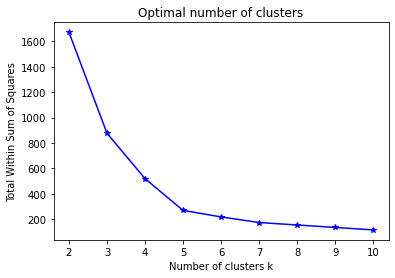

In [50]:
wss = []
K = [2,3,4,5,6,7,8,9,10]

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=23)
    kmeans = kmeans.fit(scaled_data_data_frame)
    wss.append(kmeans.inertia_)
plt.plot(K, wss, "b*-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("Optimal number of clusters")
# plt.axis([0, 11, 0, 10000])
plt.show()

It is not easy to make a good inference just by looking WSS graph because there exists multiple elbows in the graph.

## <span style="background-color:#A2CBE4"> Average Silhouette Approach </span>      
The average silhouette approach measures the quality of a clustering. It determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering. The average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximizes the average silhouette over a range of possible values for k. 

n_clusters = 2 The average silhouette_score is : 0.6731
n_clusters = 3 The average silhouette_score is : 0.6409
n_clusters = 4 The average silhouette_score is : 0.7129
n_clusters = 5 The average silhouette_score is : 0.6668
n_clusters = 6 The average silhouette_score is : 0.6456
n_clusters = 7 The average silhouette_score is : 0.6576
n_clusters = 8 The average silhouette_score is : 0.5669
n_clusters = 9 The average silhouette_score is : 0.6734
n_clusters = 10 The average silhouette_score is : 0.5842


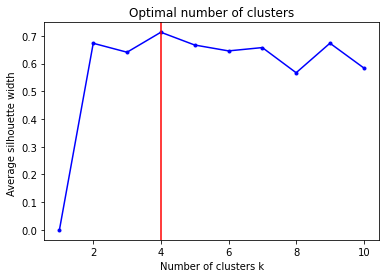

In [51]:
sil_avg = [0]
K = [2,3,4,5,6,7,8,9,10]
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=23)
    cluster_labels=kmeans.fit_predict(scaled_data_data_frame) ###same with>> cluster_labels=kmeans.labels_
    silhouette_avg = silhouette_score(scaled_data_data_frame, cluster_labels)
    sil_avg.append(silhouette_avg)
    print("n_clusters =", k, "The average silhouette_score is : %.4f" % silhouette_avg)


plt.plot(range(1,len(sil_avg)+1), sil_avg, "b.-")
plt.xlabel("Number of clusters k")
plt.ylabel("Average silhouette width ")
plt.title("Optimal number of clusters")
plt.axvline( color='r', x=sil_avg.index(max(sil_avg))+1 )
plt.show() 

According to the above graph; k=4 can be selected since it maximizes average silhouette width.

In [52]:
pca = PCA()
pca_data = pca.fit_transform(scaled_data_data_frame)
pca_data = pd.DataFrame(pca_data, columns=["x0","x1"])

For k = 2 The average silhouette_score is : 0.6731222196610417
For k = 3 The average silhouette_score is : 0.6408705662884153
For k = 4 The average silhouette_score is : 0.7129117875849642
For k = 5 The average silhouette_score is : 0.6668482124862519
For k = 6 The average silhouette_score is : 0.6456233066947507
For k = 7 The average silhouette_score is : 0.6576103457668989
For k = 8 The average silhouette_score is : 0.5668524699084383
For k = 9 The average silhouette_score is : 0.6733504549140275
For k = 10 The average silhouette_score is : 0.5841671219191259


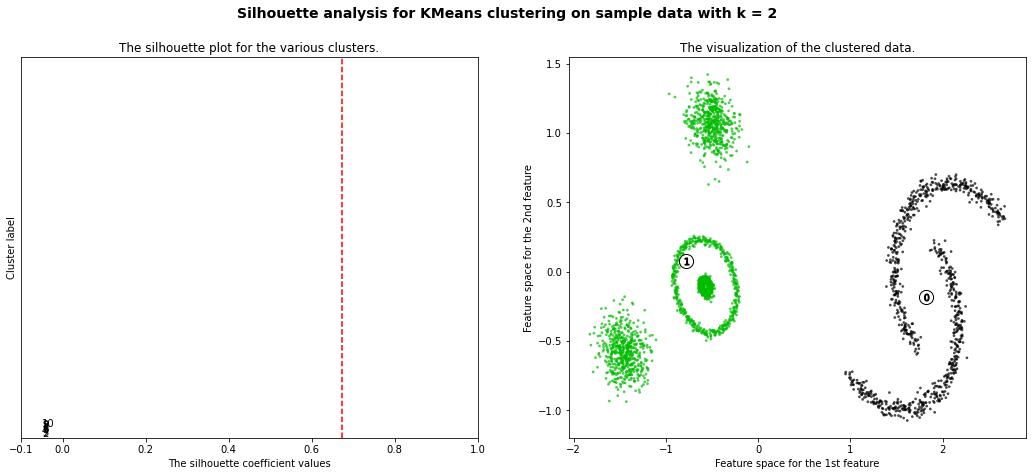

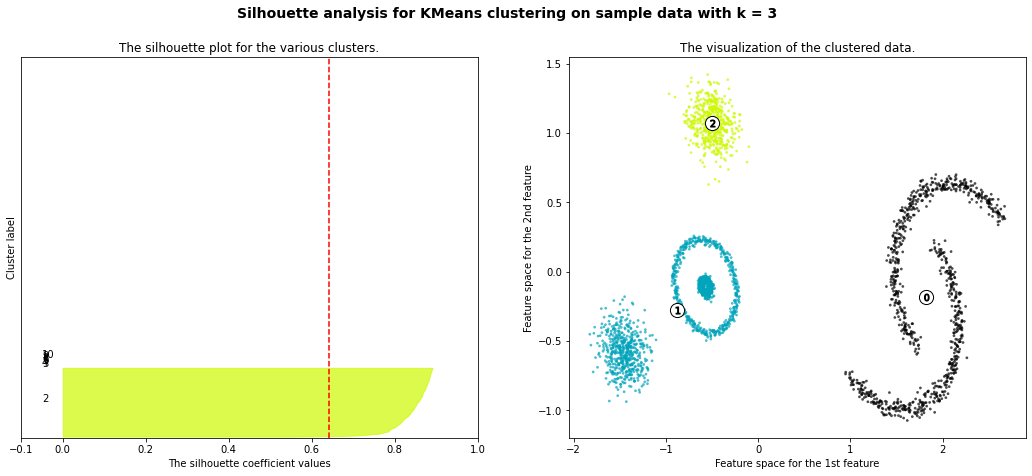

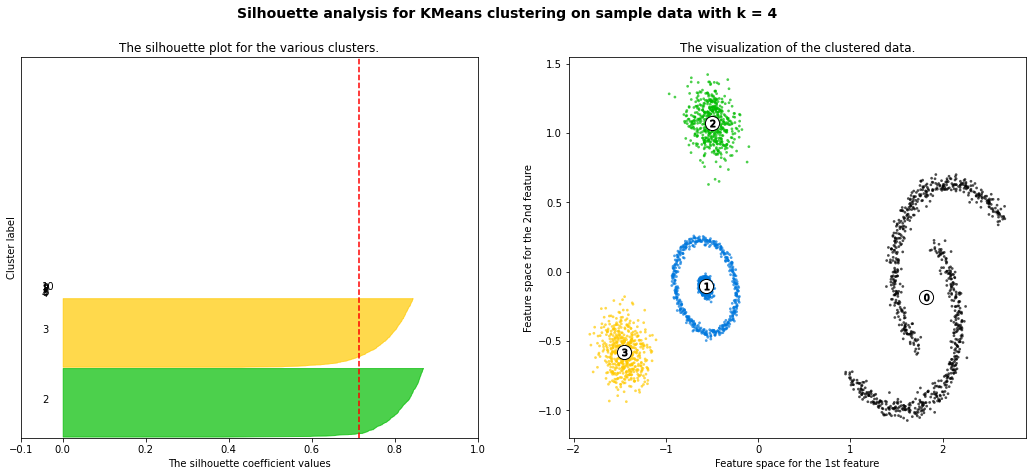

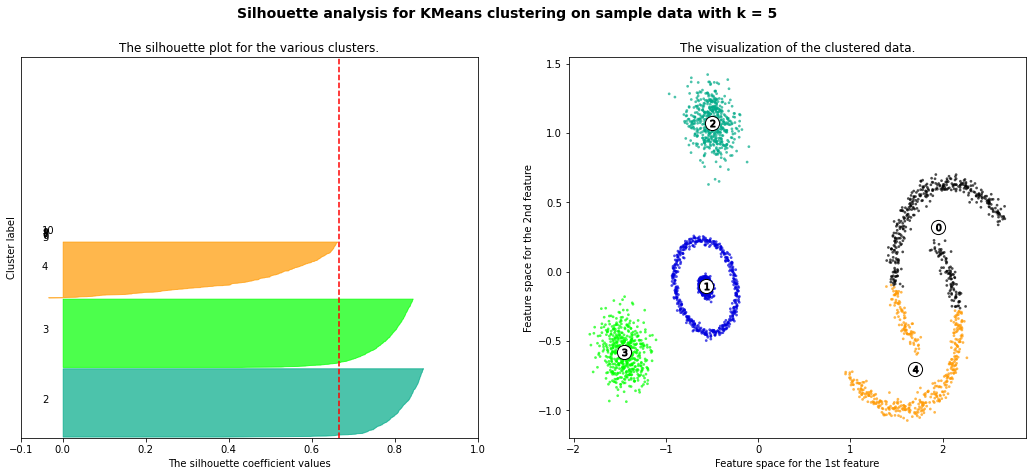

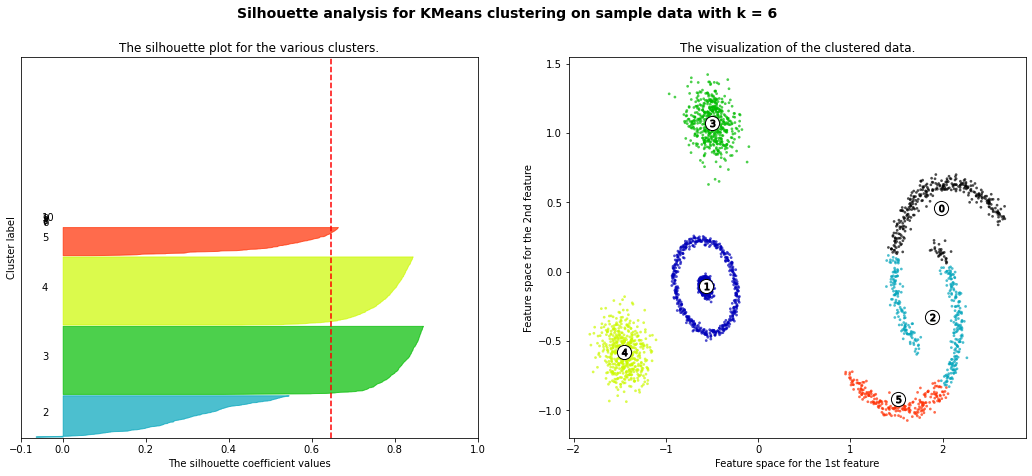

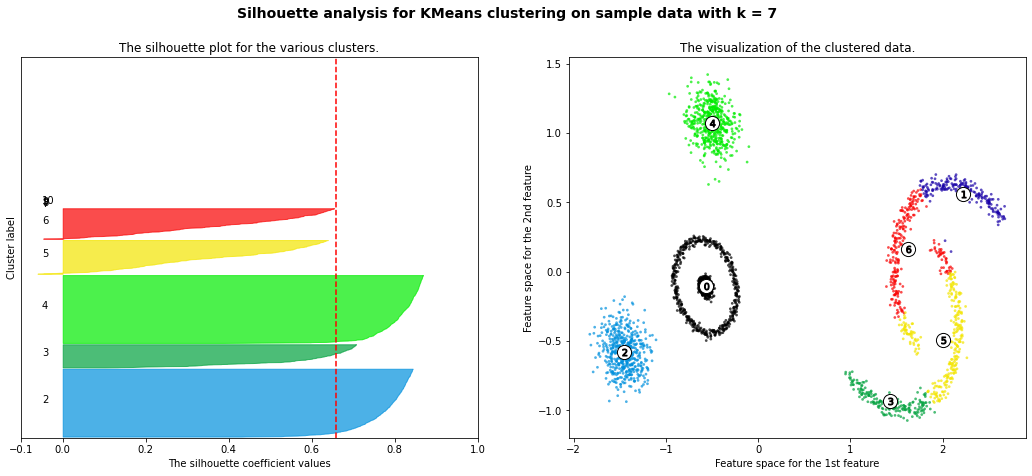

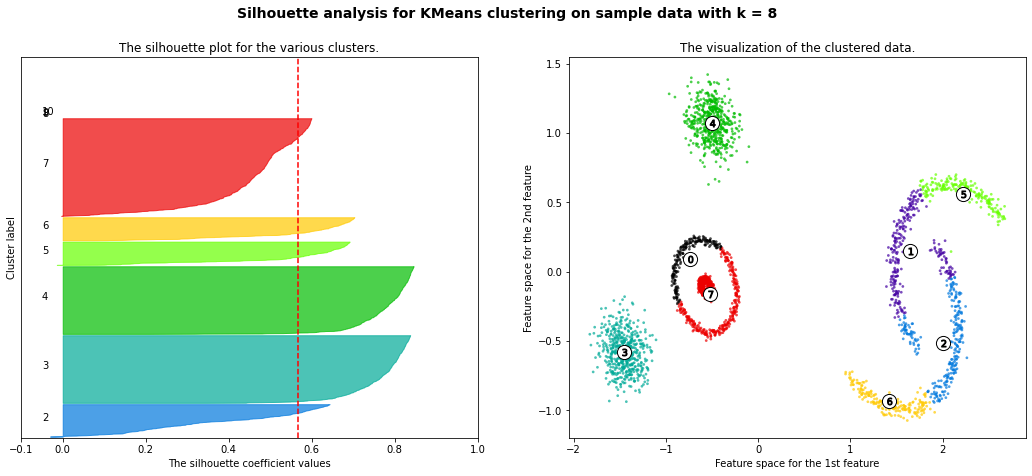

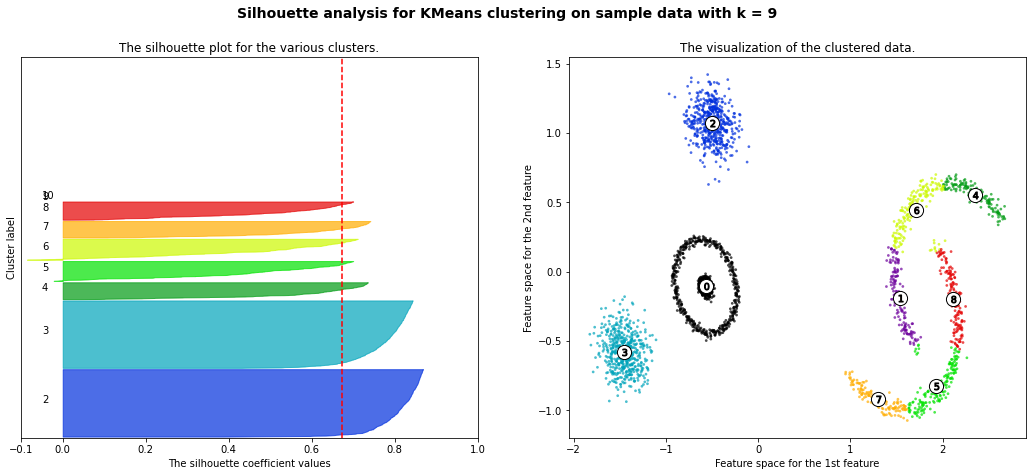

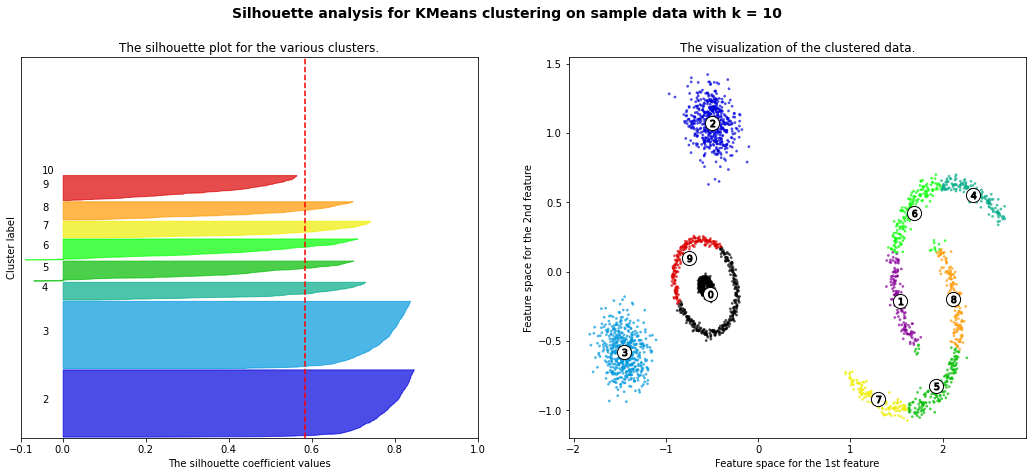

In [53]:
K = [2,3,4,5,6,7,8,9,10]


for k in K:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_data_data_frame) + (k + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=k, random_state=23)
    cluster_labels = clusterer.fit_predict(scaled_data_data_frame)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_data_data_frame, cluster_labels)
    print("For k =", k, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_data_data_frame, cluster_labels)

    y_lower = 10
    for i in K:
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    df=pca_data[["x0","x1"]].copy()
    colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
    ax2.scatter(df["x0"], df["x1"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters - take the first two principal components
    centers = pca.transform(clusterer.cluster_centers_)
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with k = %d" % k),
                 fontsize=14, fontweight='bold')

plt.show()

It is confirmed that when k=4 ; the silhouette coefficient value is the highest and data are more balanced (no sharp changes in the data). So; choose k=4

**PART2 - Q3**

In [54]:
true_labels = [0,1,2,3,4,5]

epsilon_values = [0.1 ,0.2 ,0.3 ,0.4 ,0.5 ,0.6 ,0.7 ,0.8 ,0.9 ,1.0 ,1.1 , 1.2, 1.3 ,1.4 ,1.5 ,1.6 ,1.7 ,1.8 ,1.9 ,2.0 ,2.1 ,2.2 , 2.3 ,2.4 ,2.5]
minimum_samples = [5,10,15,20]

for epsilon_val in epsilon_values:
    for sample_size in minimum_samples:
        clustering = DBSCAN(eps=epsilon_val, min_samples=sample_size).fit(scaled_data_np_array)
        print(set(clustering.labels_))

{0, 1, 2, 3, 4, 5, -1}
{0, 1, 2, 3, 4, 5, -1}
{0, 1, 2, 3, 4, 5, -1}
{0, 1, 2, 3, 4, 5, -1}
{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4, -1}
{0, 1, 2, 3, 4, -1}
{0, 1, 2, 3}
{0, 1, 2, 3}
{0, 1, 2, 3}
{0, 1, 2, 3}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}
{0}


In [55]:
from sklearn.metrics.cluster import adjusted_rand_score

true_labels = data["y"]

epsilon_values = [0.1 ,0.2 ,0.3 ,0.4 ,0.5 ,0.6 ,0.7 ,0.8 ,0.9 ,1.0 ,1.1 , 1.2, 1.3 ,1.4 ,1.5 ,1.6 ,1.7 ,1.8 ,1.9 ,2.0 ,2.1 ,2.2 , 2.3 ,2.4 ,2.5]
min_samples = [5,10,15,20]

for epsilon_val in epsilon_values:
    for sample_size in min_samples:
        clustering = DBSCAN(eps=epsilon_val, min_samples=sample_size).fit(scaled_data_data_frame)
        print(adjusted_rand_score(true_labels, clustering.labels_))






0.9965358935695121
0.9947715121614867
0.9938986539146845
0.9921428206649573
0.8240461293668712
0.8240461293668712
0.8236144119913662
0.8236144119913662
0.7090947579402614
0.7090947579402614
0.7090947579402614
0.7090947579402614
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.2544664843643732
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


As can be seen from the above results ; when eps=0.1 and min_sample=5 , the adjusted_rand_score is pretty close to 1 which means best predictions. So, the set {0, 1, 2, 3, 4, 5, -1} clusters the data best. k value equals to length of the set which is k=7

**PART 2 - Q4**

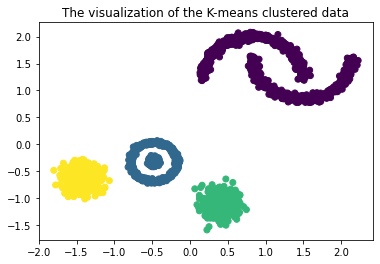

In [56]:
kmeans = KMeans(n_clusters=4, random_state=23)
df=scaled_data_data_frame[["x0","x1"]].copy()

df["clusters_k_mean"]=kmeans.fit_predict(scaled_data_data_frame)

plt.scatter(df["x0"], df["x1"],c=df.clusters_k_mean)
plt.title("The visualization of the K-means clustered data")

plt.show()

In [57]:
df.head()

,x0,x1,clusters_k_mean
0,0.860758,1.566776,0
1,1.836593,0.984397,0
2,2.143536,1.608142,0
3,2.093995,1.335252,0
4,1.477705,1.539788,0


In [58]:
kmeans = KMeans(n_clusters=4, random_state=23)

kmeans = kmeans.fit(scaled_data_data_frame)

print(adjusted_rand_score(true_labels, kmeans.labels_))

0.7090947579402614


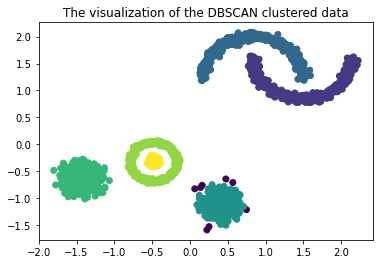

In [59]:
df2=scaled_data_data_frame[["x0","x1"]].copy()

df2["clustering_dbscan"] = DBSCAN(eps=0.1, min_samples=5).fit_predict(scaled_data_data_frame)

plt.scatter(df2["x0"], df2["x1"],c=df2.clustering_dbscan)
plt.title("The visualization of the DBSCAN clustered data")

plt.show()

In [60]:
df2.head()

,x0,x1,clustering_dbscan
0,0.860758,1.566776,0
1,1.836593,0.984397,0
2,2.143536,1.608142,0
3,2.093995,1.335252,0
4,1.477705,1.539788,1


In [61]:
data.head()

,x0,x1,y
0,281.931378,145.018979,1
1,357.750303,119.483971,1
2,381.598615,146.832723,1
3,377.749439,134.867567,1
4,329.865988,143.835645,0


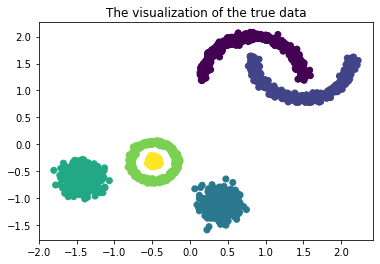

In [62]:
df3=scaled_data_data_frame[["x0","x1"]].copy()


plt.scatter(df3["x0"], df3["x1"], c=data["y"])
plt.title("The visualization of the true data")

plt.show()

Q4.(20). Plot the clusters for only the optimal k values based on predicted clusters that you obtain Q2 and Q3. Plot the original data based on the true labels. Did you obtain the same optimal k values in Q2 and Q3? Comment on the quality of the clusters that you obtained in Q2 and Q3. Can we predict the true label of the data by using clustering? Which algorithm gave a better result? What could be the reason one of them outperforms in different cases?

k=4 for Q2 and k=7 for Q3. As can be seen; Q3 with k=7 has more clusters. Cluster labelled with -1 corresponds to the noises in Q3. On the other hand, noises are not visible in Q2. As discussed in Q3; eps=0.1 and min_sample=5 gave us pretty good results which are really close to the actual values; so we can predict the true label of the data by using clustering methods. **Adjusted_rand_score of the k-means method for k=4 is obtained as 0.7090947579402614 in the above**. On the other hand, **adjusted_rand_score of the DBSCAN method for k=7 (eps=0.1 and min_sample=5) is obtained as 0.9965358935695121 (pretty close to 1)**. **That means DBSCAN method gives better results.** The reason might be that K-means clustering does not work well with outliers and noisy datasets although DBScan clustering efficiently handles outliers and noisy datasets. Moreover, K-means clustering is sensitive to the number of clusters specified which might cause significant change in the performance of the algorithm.